In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_paths = ['dataset/garden/00000027.png', 'dataset/quadrocopter2/00000165.png', 'dataset/street/00000017.png']
images = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in image_paths]

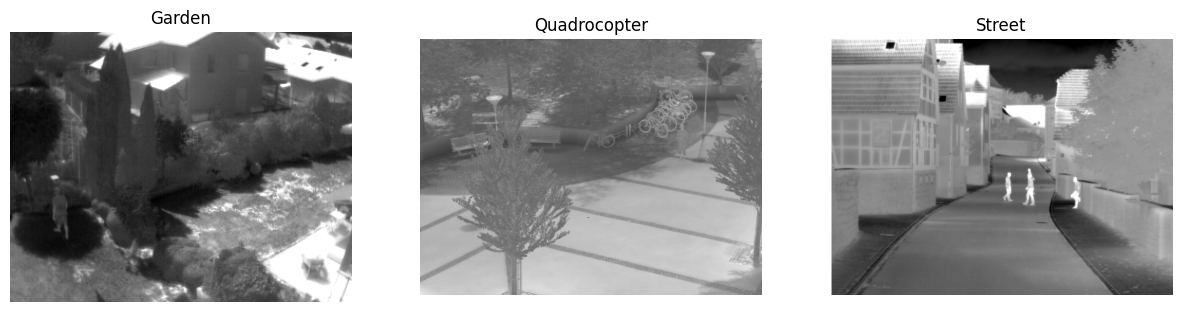

In [2]:
def display_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

display_images(images, ['Garden', 'Quadrocopter', 'Street'])

/tmp/ipykernel_107059/736110784.py:5: RuntimeWarning: divide by zero encountered in log
  log_transformed = (c * np.log(1 + image)).astype(np.uint8)
/tmp/ipykernel_107059/736110784.py:5: RuntimeWarning: invalid value encountered in cast
  log_transformed = (c * np.log(1 + image)).astype(np.uint8)


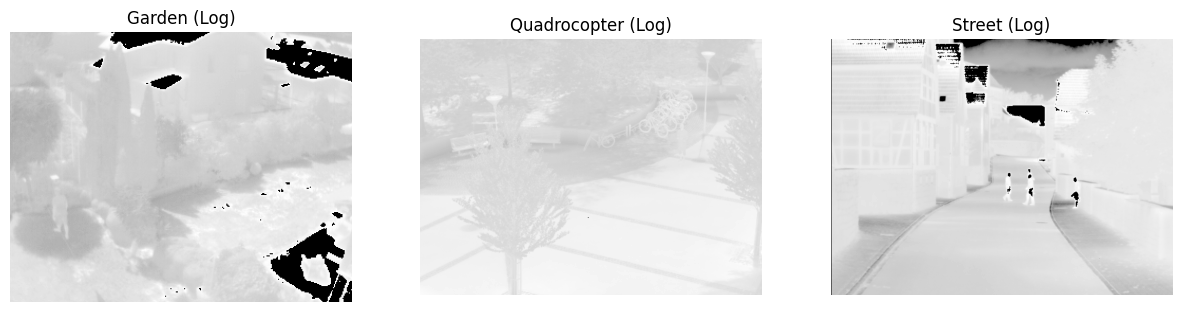

In [3]:
#Transformação Logaritmica

def log_transform(image):
    c = 255 / np.log(1 + np.max(image))
    log_transformed = (c * np.log(1 + image)).astype(np.uint8)
    return log_transformed

log_images = [log_transform(img) for img in images]
display_images(log_images, ['Garden (Log)', 'Quadrocopter (Log)', 'Street (Log)'])

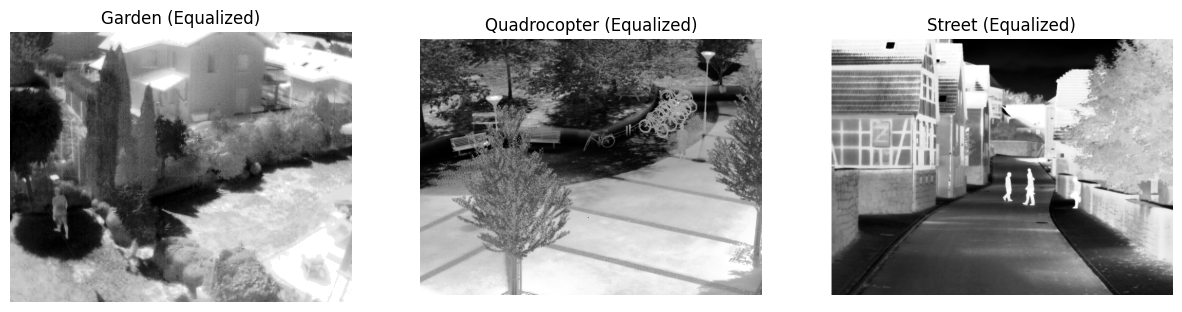

In [4]:
#Equalização de Histograma

def histogram_equalization(image):
    return cv2.equalizeHist(image)

equalized_images = [histogram_equalization(img) for img in images]
display_images(equalized_images, ['Garden (Equalized)', 'Quadrocopter (Equalized)', 'Street (Equalized)'])


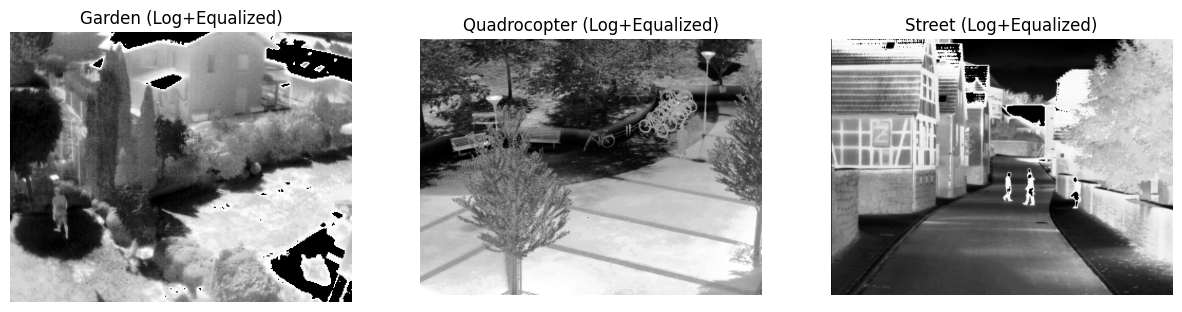

In [5]:
log_equalized_images = [histogram_equalization(img) for img in log_images]
display_images(log_equalized_images, ['Garden (Log+Equalized)', 'Quadrocopter (Log+Equalized)', 'Street (Log+Equalized)'])

### Para o "Histogram matching" (juntar o histograma de uma imagem com outro de referência) vamos utilizar skimage

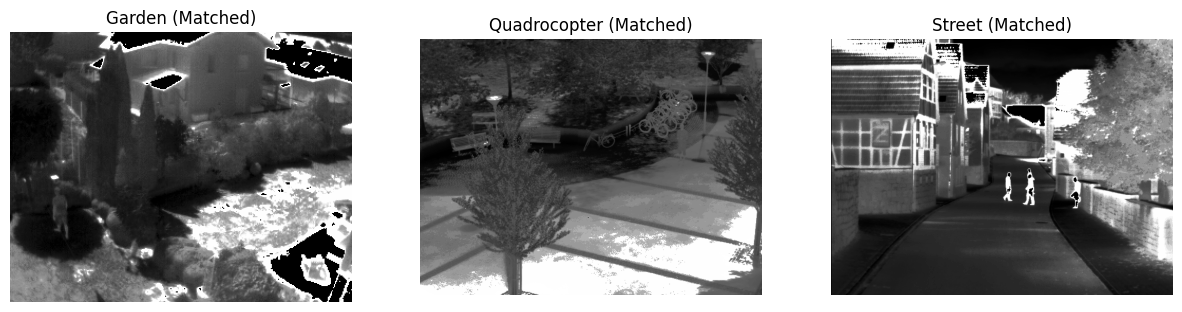

In [10]:
from skimage.exposure import match_histograms

def histogram_matching(image, reference):
    matched = match_histograms(image, reference, channel_axis=None)
    return matched.astype(np.uint8)

img_base = images[0]
matched_images = [histogram_matching(img, img_base) for img in log_equalized_images]
display_images(matched_images, ['Garden (Matched)', 'Quadrocopter (Matched)', 'Street (Matched)'])

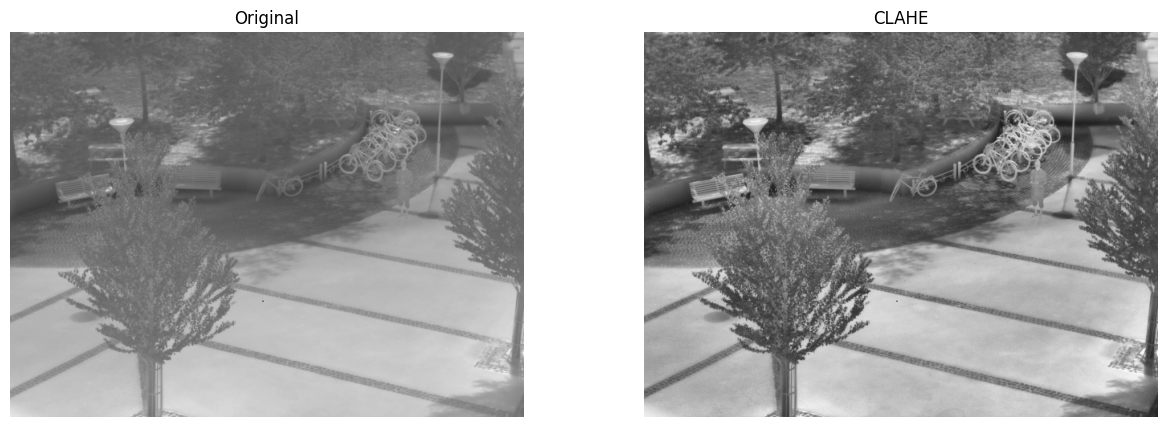

In [23]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(images[1])
display_images([images[1], clahe_img], ['Original', 'CLAHE'])


In [18]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

original = images[1]
processed = matched_images[1]

print("PSNR:", peak_signal_noise_ratio(original, processed))
print("SSIM:", structural_similarity(original, processed))


PSNR: 19.145384534217577
SSIM: 0.8572952094348536


In [24]:
original = images[1]
processed = clahe_img

print("PSNR:", peak_signal_noise_ratio(original, processed))
print("SSIM:", structural_similarity(original, processed))

PSNR: 22.99755717301625
SSIM: 0.8330449093823541
